In [1]:
import os
import sys
import json
import logging
from dotenv import load_dotenv 
load_dotenv()
sys.path.append(os.getenv("PROJECT_PATH"))
from src.utils.azure_client import AzureClient, get_answer
from src.utils.ollama_client import OllamaClient
from src.graph.plot_class import PlotClass
from src.Evaluators.gpt_evaluator import GPTEvaluator

from src.Obfuscators.wrong_obfuscator import WrongObfuscator
from src.Obfuscators.fake_obfuscator import FakeObfuscator
from src.Obfuscators.few_prompt_obfuscator import FewPromptsObfuscator
from src.Obfuscators.three_prompt_obfuscator import ThreePromptsObfuscator
from src.Obfuscators.random_text import RandomText
from src.Obfuscators.totally_random_emoji import TotallyRandomEmoji


In [3]:
client = OllamaClient("llama3:8b", "../", "llama3:8b", 0.0)
print(client.send_query("from the following text return a json list containing random 80% of the words in the txt:\n directors such as Akira Kurosawa, Yasujirō Ozu, and Hayao Miyazaki have significantly contributed to the global influence of Japanese cinema through their distinctive works by introducing unique storytelling techniques, visual styles, and thematic depth. Akira Kurosawa, for instance, is renowned for his masterful use of narrative structure and character development, which have set new standards in filmmaking. Yasujirō Ozu's films often explore the intricacies of human relationships and societal"))

Here is a JSON list containing 80% of the words from the text:

```
[
  "directors",
  "such",
  "as",
  "Akira",
  "Kurosawa",
  "Yasujirō",
  "Ozu",
  "and",
  "Hayao",
  "Miyazaki",
  "have",
  "significantly",
  "contributed",
  "to",
  "the",
  "global",
  "influence",
  "of",
  "Japanese",
  "cinema",
  "through",
  "their",
  "distinctive",
  "works",
  "by",
  "introducing",
  "unique",
  "storytelling",
  "techniques",
  "visual",
  "styles",
  "and",
  "thematic",
  "depth",
  "Akira",
  "Kurosawa",
  "for",
  "instance",
  "is",
  "renowned",
  "for",
  "his",
  "masterful",
  "use",
  "of",
  "narrative",
  "structure",
  "and",
  "character",
  "development",
  "which",
  "have",
  "set",
  "new",
  "standards",
  "in",
  "filmmaking",
  "Yasujirō",
  "Ozu's",
  "films",
  "often",
  "explore",
  "the",
  "intricacies",
  "of",
  "human",
  "relationships",
  "and",
  "societal"
]
```

Note that I used a random number generator to select 80% of the words from the text. The

In [3]:
disable_httpx_log = logging.getLogger("httpx")
disable_httpx_log.setLevel(logging.WARNING)
logging.basicConfig(filename="random_log", level=logging.INFO)
logger = logging.getLogger(__name__)

In [4]:
def prompt_loader(prompt_path: str) -> str:
    with open(prompt_path, 'r', encoding='utf-8') as file:
        return file.read()

In [210]:
azure_llm_wrapper_factory = lambda :AzureClient("azure_client",  "../", "gpt-4o-2024-05-13", 0.0)


prompt_folder = os.path.join(os.getenv("PROJECT_PATH"),"src","Obfuscators","prompts")
sensitive_file_path =os.path.join(prompt_folder,"naive","extract_terms_prompt.txt")
crucial_file_path =os.path.join(prompt_folder,"naive","crucial_prompt.txt")
dictionary_file_path =os.path.join(prompt_folder,"naive","dictionary_prompt.txt")

three_prompt_list = [prompt_loader(sensitive_file_path),prompt_loader(crucial_file_path),prompt_loader(dictionary_file_path)]   
cpprefix = "Do not explain the emojis in your answer and do not add new emojis that were not in the original question.\n"

threeprompt_factory = lambda : ThreePromptsObfuscator(three_prompt_list, azure_llm_wrapper_factory, logger, cpprefix)

print(three_prompt_list)

NameError: name 'prompt_loader' is not defined

In [10]:
obfuscated_text = threeprompt_factory().obfuscate({"original_question":"How does implementing a Continuous Integration/Continuous Deployment (CI/CD) pipeline improve our software development lifecycle, and what tools can we use to automate this process? BE CONCISE"})

'Do not explain the emojis in your answer and do not add new emojis that were not in the original question.\nHow does implementing a Continuous Integration/Continuous Deployment (CI/CD) 🔄🚀 improve our software development lifecycle, and what tools can we use to automate this process? BE CONCISE'

In [2]:
obfuscators=[
    (WrongObfuscator,{
    }),
    (FakeObfuscator,{
    })
]

i = 0
for Obfuscator_class, obfuscator in obfuscators:
    print(i)
    i += 1

0
1


In [52]:
two_prompt_1_path = os.path.join(os.getenv("PROJECT_PATH"),"src","Obfuscators","prompts","two_querries", "first_querry.txt")
two_prompt_2_path = os.path.join(os.getenv("PROJECT_PATH"),"src","Obfuscators","prompts","two_querries", "second_querry_random_emoji.txt")


with open(two_prompt_1_path, 'r', encoding='utf-8') as file:
    two_prompt_1 = file.read()
with open(two_prompt_2_path, 'r', encoding='utf-8') as file:
    two_prompt_2 = file.read()



cpprefix = "Do not explain the emojis in your answer.\n"
smart_random_emoji = lambda : FewPromptsObfuscator([two_prompt_1,two_prompt_2], azure_llm_wrapper_factory, logger, cpprefix)
totally_random_emoji = lambda : TotallyRandomEmoji()
random_text = lambda : RandomText(azure_llm_wrapper_factory)

gpt_evaluator = GPTEvaluator(logger, "..")

GPT EVALUATOR INIT


In [28]:
import os
import random
import pprint
from colorama import init, Fore, Style

data_to_use = "12_8_results.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"),"data","12-8-2024",data_to_use)
with open(inputfile_path, 'r') as file:
    data = json.load(file)

for obfuscator in data:
    if "FewPromptsObfuscator" in obfuscator[0]:
        sample = random.sample(obfuscator[1], 1)
        for dict_index in sample:
            #if "Can you discuss the differences between symmetric and asymmetric encryption, and how each method is used" in dict_index["original_prompt"]:
            print(Fore.GREEN + "Original Prompt:")
            pprint.pprint(dict_index["original_prompt"])
            print(Fore.YELLOW + "Obfuscated Prompt:")
            pprint.pprint(dict_index["obfuscated_prompt"])
            print(Fore.CYAN + "Prompt Metric:")
            pprint.pprint(dict_index["prompt_metric"])
            print(Style.RESET_ALL)
            print(Fore.LIGHTGREEN_EX + "Original Answer:")
            pprint.pprint(dict_index["original_answer"])
            print(Fore.LIGHTYELLOW_EX + "Obfuscated Answer:")
            pprint.pprint(dict_index["obfuscated_answer"])
            print(Fore.CYAN + "Answer Metric Reasoning:")
            pprint.pprint(dict_index["answer_metric reasoning"])
            pprint.pprint(dict_index["answer_metric"])
            print(Style.RESET_ALL)

Original Prompt:
('What are the benefits and limitations of using a distributed ledger '
 'technology like blockchain for financial transactions, and how does it '
 'compare to traditional centralized systems? BE CONCISE')
Obfuscated Prompt:
('Do not explain the emojis in your answer and do not add new emojis that were '
 'not in the original question.\n'
 'What are the benefits and limitations of using a 📜🔗💻 like ⛓️🧱 for 💸💳, and '
 'how does it compare to 🏛️🔒? BE CONCISE')
Prompt Metric:
{'replaced terms': 0.6666666666666667, 'similarity': 1.0}

Original Answer:
('**Benefits of Blockchain for Financial Transactions:**\n'
 '\n'
 '1. **Transparency:** All participants have access to the same data, reducing '
 'the risk of fraud.\n'
 '2. **Security:** Cryptographic techniques ensure data integrity and '
 'security.\n'
 '3. **Decentralization:** Eliminates the need for a central authority, '
 'reducing single points of failure.\n'
 '4. **Efficiency:** Can streamline processes and reduce t

In [54]:
original_prompt = "How does the use of machine learning algorithms in predictive analytics enhance decision-making processes in businesses, and what are some common challenges faced during implementation? BE CONCISE"
original_answer = "Machine learning algorithms enhance decision-making in businesses by analyzing large datasets to identify patterns, predict outcomes, and provide actionable insights. This leads to more informed, data-driven decisions, improved efficiency, and competitive advantages.\n\nCommon challenges during implementation include:\n\n1. **Data Quality**: Incomplete or inaccurate data can lead to poor model performance.\n2. **Complexity**: Developing and tuning models requires specialized skills and knowledge.\n3. **Integration**: Incorporating machine learning systems into existing workflows and IT infrastructure can be difficult.\n4. **Scalability**: Ensuring models perform well as data volume grows.\n5. **Bias**: Models can perpetuate or amplify existing biases in data.\n6. **Cost**: High initial investment in technology and talent.\n\nAddressing these challenges requires careful planning, ongoing monitoring, and a commitment to data governance and ethical practices."

In [58]:
obfuscated_prompt = totally_random_emoji().obfuscate(original_prompt)
print(obfuscated_prompt)

How does the use of machine learning algorithms in predictive analytics enhance decision-making processes in businesses, and what are some common challenges faced during implementation? BE CONCISE


In [56]:
print(get_answer("What is the capital of France?",model = "gpt-35-turbo"))

AuthenticationError: Error code: 401 - {'statusCode': 401, 'message': 'Access denied due to invalid subscription key. Make sure to provide a valid key for an active subscription.'}

In [ ]:
results_arr = []
for i in range (1):
    obfuscated_prompt = totally_random_emoji().obfuscate(original_prompt)
    prompt_evaluation = gpt_evaluator.evaluate_prompt(original_prompt, obfuscated_prompt)
    answer = AzureClient.get_answer(original_prompt)
    answer_evaluation = gpt_evaluator.evaluate_prompt(original_answer, answer)
    print("""
obfuscated_prompt: {obfuscated_prompt}
prompt_evaluation: {prompt_evaluation}
answer: {answer}
answer_evaluation: {answer_evaluation}
          """)
    results_arr.append(prompt_evaluation)

AuthenticationError: Error code: 401 - {'statusCode': 401, 'message': 'Access denied due to invalid subscription key. Make sure to provide a valid key for an active subscription.'}

In [25]:
import unicodedata
import json
import os

text1 =  "**Advantages of NoSQL for Large-Scale, Unstructured Data:**\n\n1. **Scalability:** NoSQL databases are designed to scale out by adding more servers, making them ideal for handling large volumes of data.\n2. **Flexibility:** They can store unstructured, semi-structured, and structured data without requiring a fixed schema, allowing for more agile development.\n3. **Performance:** Optimized for read and write operations, NoSQL databases can offer faster performance for certain types of queries and workloads.\n4. **Distributed Architecture:** Many NoSQL databases are built to be distributed, providing high availability and fault tolerance.\n\n**Disadvantages of NoSQL for Large-Scale, Unstructured Data:**\n\n1. **Consistency:** NoSQL databases often sacrifice consistency (in favor of availability and partition tolerance) due to the CAP theorem, which can complicate data integrity.\n2. **Complexity:** Managing and querying unstructured data can be more complex and may require specialized knowledge.\n3. **Maturity:** NoSQL databases are generally newer and may lack some of the robust tooling and community support available for traditional relational databases.\n4. **Limited ACID Transactions:** Many NoSQL databases do not fully support ACID transactions, which can be a drawback for applications requiring strong transactional integrity."
text2 =  """Advantages of NoSQL database:
- 🌐⚡
- 💰⬇️
- 🛠️🔄

Disadvantages of NoSQL database:
- 📶❌
- 🔒❓
- 🕒⬆️
"""
print(text1)
print(text2)

**Advantages of NoSQL for Large-Scale, Unstructured Data:**

1. **Scalability:** NoSQL databases are designed to scale out by adding more servers, making them ideal for handling large volumes of data.
2. **Flexibility:** They can store unstructured, semi-structured, and structured data without requiring a fixed schema, allowing for more agile development.
3. **Performance:** Optimized for read and write operations, NoSQL databases can offer faster performance for certain types of queries and workloads.
4. **Distributed Architecture:** Many NoSQL databases are built to be distributed, providing high availability and fault tolerance.

**Disadvantages of NoSQL for Large-Scale, Unstructured Data:**

1. **Consistency:** NoSQL databases often sacrifice consistency (in favor of availability and partition tolerance) due to the CAP theorem, which can complicate data integrity.
2. **Complexity:** Managing and querying unstructured data can be more complex and may require specialized knowledge.
3

In [30]:
answer_prompt = """give a number between 0.0 to 1.0 where 0.0 is not similar at all and 1.0 signifies that the texts are highly similar for a human to understand. The two following texts:
Text1: {text1}
Text2: {text2}
Please provide the similarity score along with a brief explanation of the rationale behind the score. Print $ANSWER: <number>"""


def evaluate_answer(answer_prompt, obfuscated_answer, original_answer):
        query = answer_prompt.format(text1=obfuscated_answer, text2=original_answer)
        answer = get_answer(query)
        print(f"""evaluate_answer
Prompt: {query}
Answer: {answer}""")
        
print(evaluate_answer(answer_prompt, text2, text1))


evaluate_answer
Prompt: give a number between 0.0 to 1.0 where 0.0 is not similar at all and 1.0 signifies that the texts are highly similar for a human to understand. The two following texts:
Text1: Advantages of NoSQL database:
- 🌐⚡
- 💰⬇️
- 🛠️🔄

Disadvantages of NoSQL database:
- 📶❌
- 🔒❓
- 🕒⬆️

Text2: **Advantages of NoSQL for Large-Scale, Unstructured Data:**

1. **Scalability:** NoSQL databases are designed to scale out by adding more servers, making them ideal for handling large volumes of data.
2. **Flexibility:** They can store unstructured, semi-structured, and structured data without requiring a fixed schema, allowing for more agile development.
3. **Performance:** Optimized for read and write operations, NoSQL databases can offer faster performance for certain types of queries and workloads.
4. **Distributed Architecture:** Many NoSQL databases are built to be distributed, providing high availability and fault tolerance.

**Disadvantages of NoSQL for Large-Scale, Unstructured

In [20]:
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"),"data","RESULTS_gpt_metric_new_test2024-08-08_18_08_45.489784 - Smart Random Emoji - New Prefix.json")
with open(inputfile_path, 'r') as file:
        data = json.load(file)
for obf in data:
    if obf[0] == "RandomText":
        for dict_elem in obf[1]:
            if "Can you explain the concept of containerization and how Docker helps in creating, deploying, and running applications within containers? BE CONCISE" in dict_elem["original_prompt"]:
                print(dict_elem["obfuscated_dictonary"])

{'containerization': '🐳📦', 'Docker': '🐋⚓', 'creating applications': '🛠️📱', 'deploying applications': '🚀📤', 'running applications': '🏃\u200d♂️💻', 'containers': '📦🚢'}


In [14]:
#Input should containg list of tuples with first value the Obfuscator class and second value its inputs: llm_wrapper_factory: Callable[[],AzureClient | OllamaClient], prompt_list: list[str], prefix: str
def load_obfuscators(obfuscators_definition: List[Tuple[Obfuscator, Dict[str, Union[Callable[[],AzureClient | OllamaClient], List[str], str]]]],
                            logger: logging.Logger) -> list[(str,Callable[[],Obfuscator])]:
    obfuscators_list = []
    for Obfuscator_class, obfuscator in obfuscators_definition:

        new_obfuscator_class = Obfuscator_class(**obfuscator, logger=logger)
        obfuscator_name = new_obfuscator_class.get_name() 

        obfuscators_list.append((obfuscator_name,lambda: new_obfuscator_class))
        print(obfuscators_list[-1][0],obfuscators_list[-1][1]().get_name())
    return obfuscators_list


<class 'function'>


In [ ]:
obfuscators = [

    # (FewPromptsObfuscator,{
    #     "llm_wrapper_factory": azure_llm_wrapper_factory, "prompt_list": two_prompt_list, "prompt_prefix": cpprefix
    # }),
    # (ThreePromptsObfuscator,{
    #     "llm_wrapper_factory": azure_llm_wrapper_factory, "prompt_list": three_prompt_list, "prompt_prefix": cpprefix
    # }),
    # (SmartRandom,{
    #     "llm_wrapper_factory": azure_llm_wrapper_factory, "prompt_list": smart_random_list, "prompt_prefix": cpprefix
    # }),
    # (RandomText,{
    #     "llm_wrapper_factory": azure_llm_wrapper_factory
    # }),
    (WrongObfuscator,{
    }),
    (FakeObfuscator,{
    })
    ]

    # loaded_obfuscators = load_obfuscators(obfuscators, logger)
    # print(loaded_obfuscators)
    # print(loaded_obfuscators[0][0],loaded_obfuscators[0][1]().__class__.__name__)
    # print(loaded_obfuscators[1][0],loaded_obfuscators[1][1]().__class__.__name__)

In [30]:
from sentence_transformers import SentenceTransformer

OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\orendi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [96]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = [
    "Smoking is prohibited inside the venue, but alcohol consumption is allowed",
    "Smoking is allowed inside the venue, but alcohol consumption is prohibited",
    "He drove to the stadium.",
]
sentences_2=[
"May I pet your dog?",
"May I pet your corgi?",
"May I pet your cat?",
"May I beat your cat?",
"Does this bus go to the train station?",
]
# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)
# tensor([[1.0000, 0.6660, 0.1046],
#         [0.6660, 1.0000, 0.1411],
#         [0.1046, 0.1411, 1.0000]])


OSError: [WinError 126] The specified module could not be found. Error loading "c:\Users\orendi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

FakeObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: -0.19763313812800756


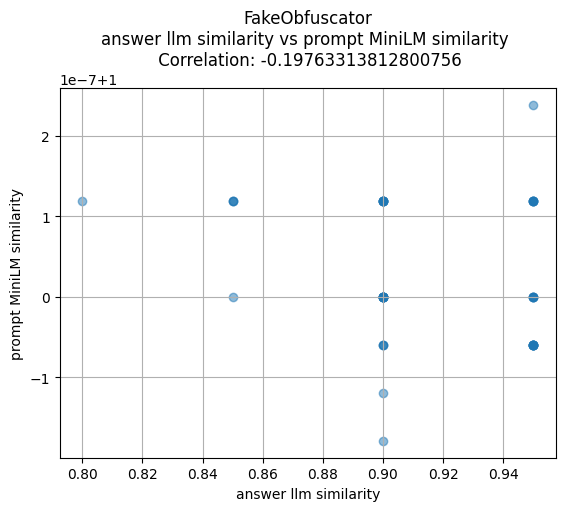

Correlation between answer llm similarity and prompt azure similarity: -0.1428571424519625


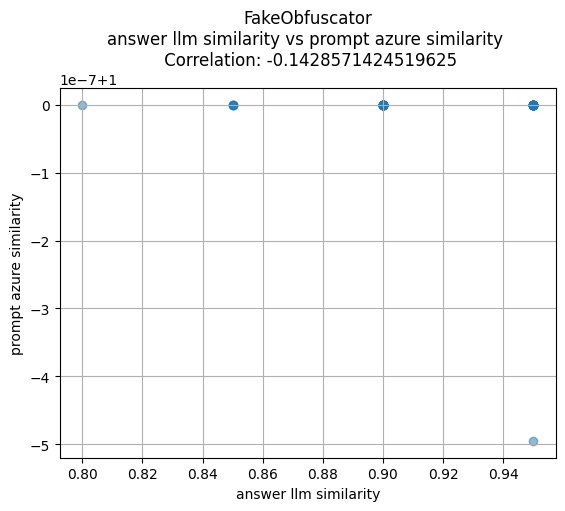

Correlation between prompt MiniLM similarity and prompt azure similarity: -0.15371466302680595


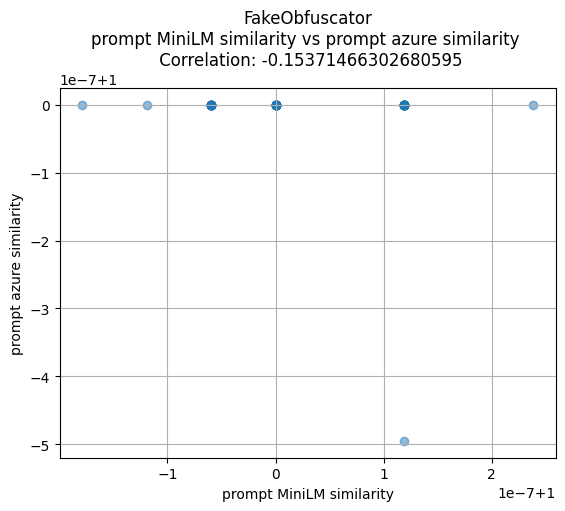

WrongObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.015745715737912263


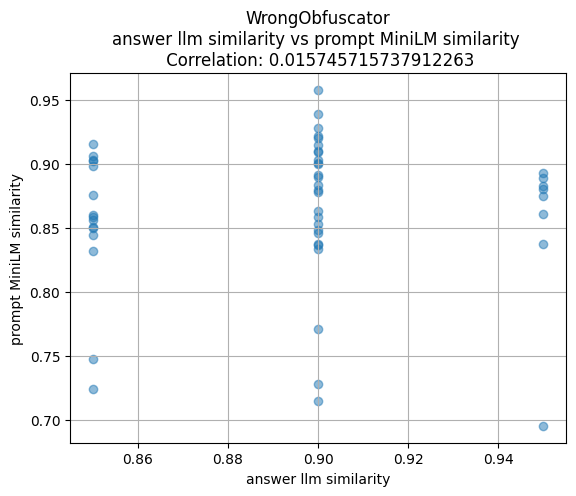

Correlation between answer llm similarity and prompt azure similarity: 0.17259543138489078


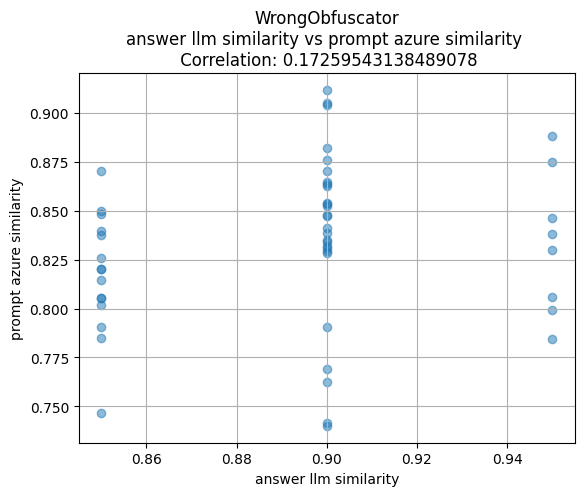

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.34367898429789895


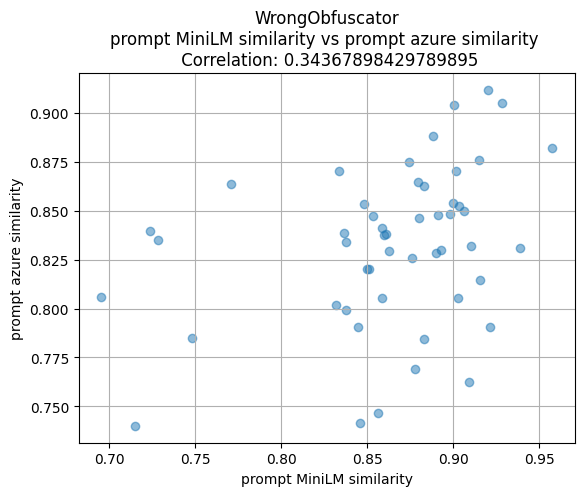

SmartRandom
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.46783019920568436


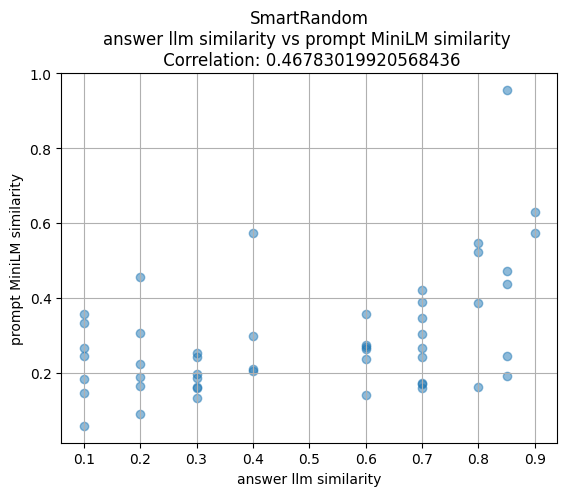

Correlation between answer llm similarity and prompt azure similarity: 0.374770460334614


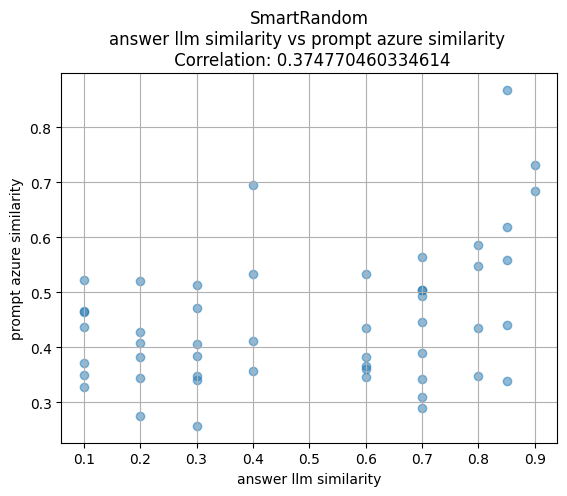

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.8785748353771877


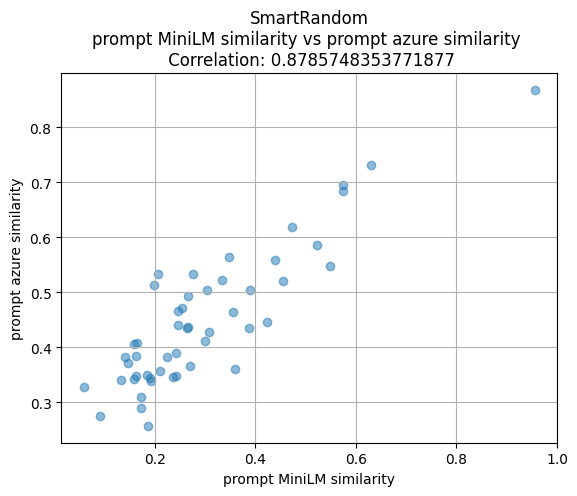

RandomText
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.11705539030675936


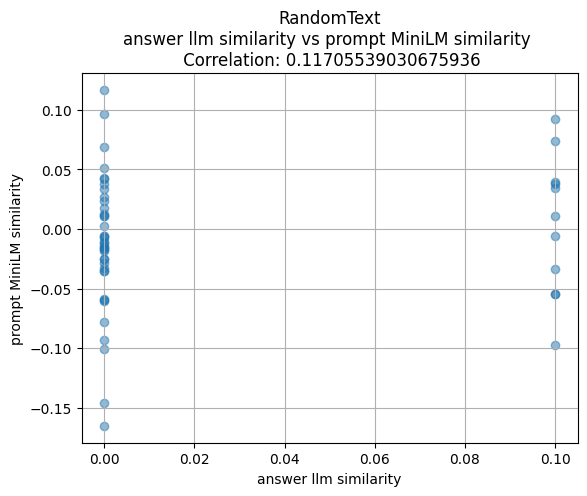

Correlation between answer llm similarity and prompt azure similarity: 0.18507029177877635


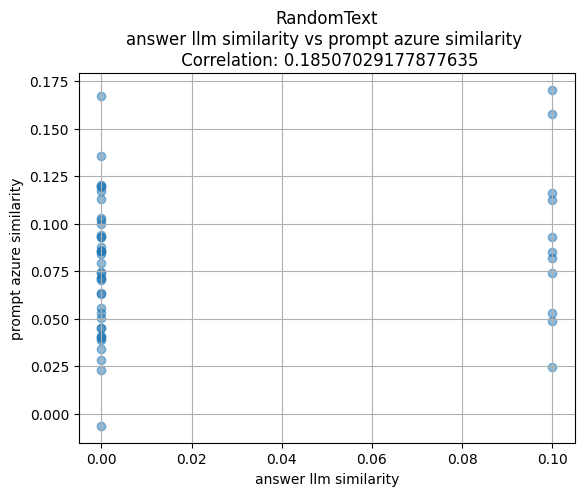

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.5326394907114755


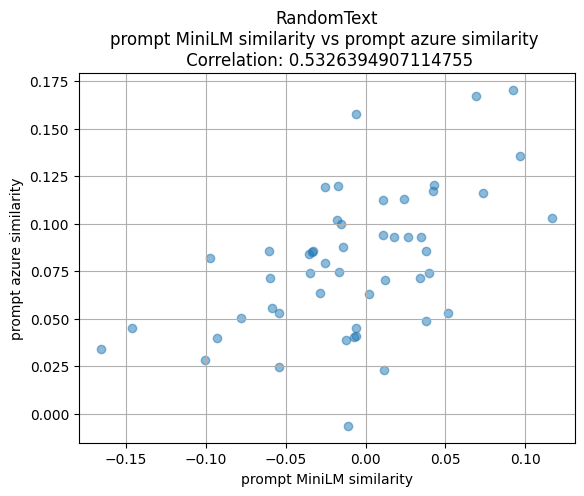

FewPromptsObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.29438796479380225


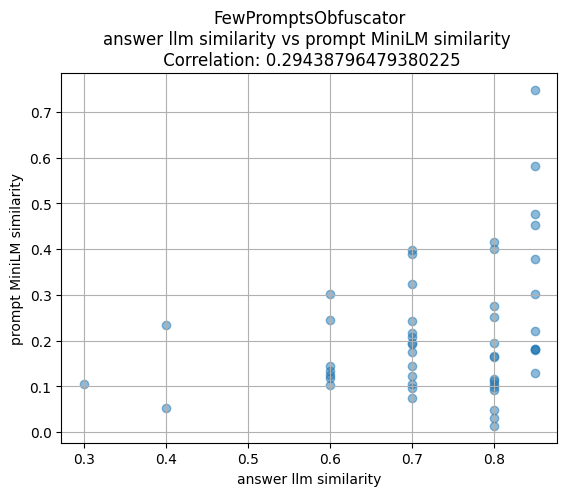

Correlation between answer llm similarity and prompt azure similarity: 0.3967941253639248


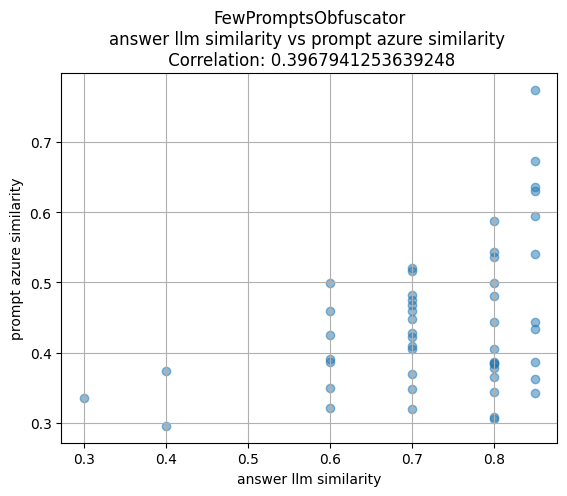

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.8370760376744494


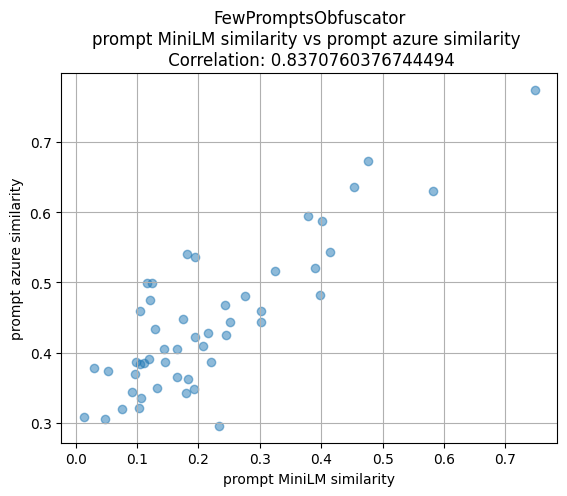

ThreePromptsObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.4794450989493465


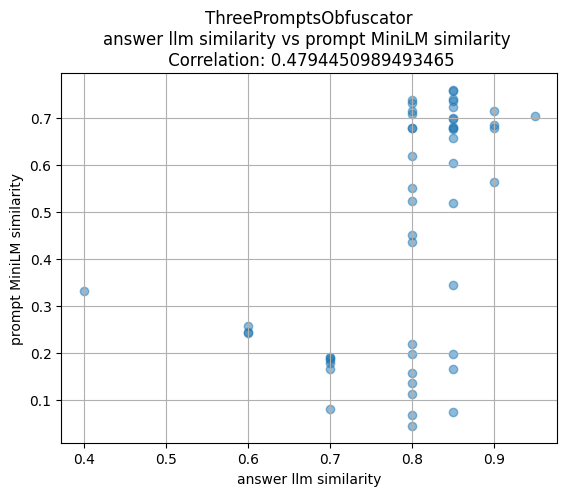

Correlation between answer llm similarity and prompt azure similarity: 0.5502180649704851


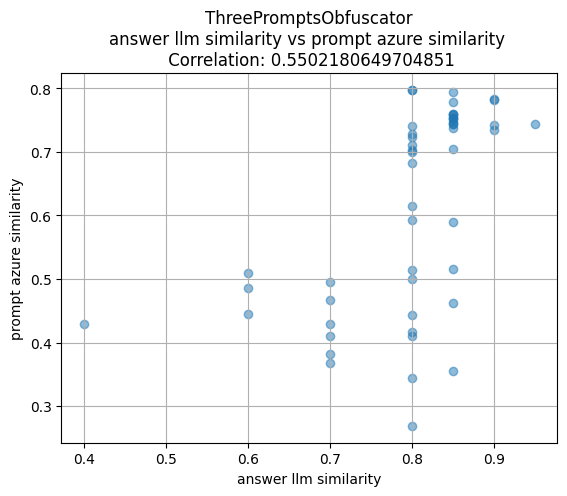

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.9440422107088311


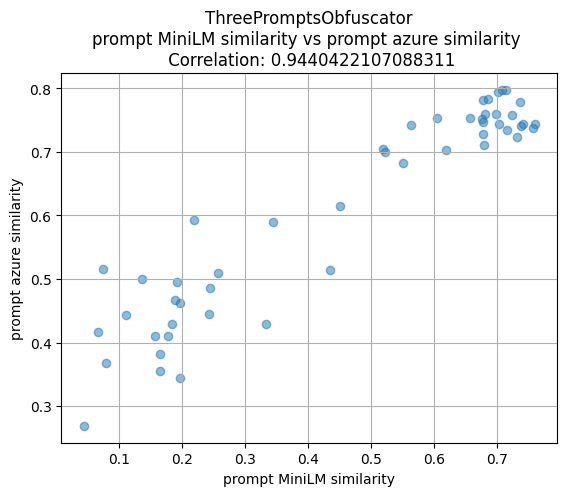

In [93]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the JSON file
data_to_use = "12_8_results_with_azure.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "12-8-2024", data_to_use)

# Load the JSON data
with open(inputfile_path, 'r') as file:
    data = json.load(file)

# Extract prompt_metric and answer_metric into a DataFrame
metrics = []

similarity_columns = ['answer llm similarity', 'prompt MiniLM similarity', 'prompt azure similarity']

for obfuscator in data:
    print (obfuscator[0])
    metrics = []
    for dict_index in obfuscator[1]:
        # if dict_index["answer_metric"]["llm similarity"] == 0.4 and obfuscator[0]=="FewPromptsObfuscator":
        #     print(dict_index)
        metrics.append({
            'answer llm similarity': dict_index['answer_metric']['llm similarity'],
            'prompt MiniLM similarity': dict_index['prompt_metric']['MiniLM similarity'],
            'prompt azure similarity': dict_index['prompt_metric']['azure similarity']
        })
     
    df = pd.DataFrame(metrics)
    print(len(df))
    for i in range(len(similarity_columns)):
        for j in range(i+1, len(similarity_columns)):
            correlation = df[similarity_columns[i]].corr(df[similarity_columns[j]])
            print(f"Correlation between {similarity_columns[i]} and {similarity_columns[j]}: {correlation}")

            plt.clf()   
            plt.scatter(df[similarity_columns[i]], df[similarity_columns[j]], alpha=0.5)
            plt.title(f'{obfuscator[0]}\n{similarity_columns[i]} vs {similarity_columns[j]} \n Correlation: {correlation}')
            plt.xlabel(similarity_columns[i])
            plt.ylabel(similarity_columns[j])
            plt.grid(True)

            name = f"scatter_plot_{obfuscator[0]}_{similarity_columns[i]}_{similarity_columns[j]}.png"
            output_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "13-8-2024", "prompt embedding to llm answer correlation",name)            
            plt.show()


In [66]:
import pprint
from colorama import init, Fore, Style
import json
from random import sample

data_to_use = "12_8_results_with_azure.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "12-8-2024", data_to_use)
with open(inputfile_path, 'r') as file:
    obfuscators_results = json.load(file)
i = 0
data = []
for obfuscator in obfuscators_results:
    metrics = []
    if obfuscator[0]=="ThreePromptsObfuscator":
        print (obfuscator[0])
        for dict_index in obfuscator[1]:
            sub_data = {}
            need_to_add = False
            match  dict_index["answer_metric"]["llm similarity"]:
                case 0.4:
                    need_to_add = True
                case 0.7:
                    if i<3:
                        need_to_add = True
                        i += 1
            if need_to_add:
                sub_data["obfuscator_name"] = obfuscator[0]
                sub_data["original_prompt"] = dict_index["original_prompt"]
                sub_data["obfuscated_prompt"] = dict_index["obfuscated_prompt"]
                sub_data["original_answer"] = dict_index["original_answer"]
                sub_data["deobfuscated_answer"] = dict_index["deobfuscated_answer"]
                sub_data["answer_metric"] = dict_index["answer_metric"]
                sub_data["answer_metric reasoning"] = dict_index["answer_metric reasoning"]
                sub_data["obfuscated_dictonary"] = dict_index["obfuscated_dictonary"]
                data.append(sub_data)
                

with open("sample_anomalies.json", "w", encoding='utf8') as file:
    json.dump(data, file, indent=5, ensure_ascii=False)

ThreePromptsObfuscator


In [60]:
import os
import json

# Define the path to the JSON file
data_to_use = "sample_anomalies.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), data_to_use)

# Load the JSON data
with open(inputfile_path, 'r', encoding='utf8') as file:
    data = json.load(file)

# Function to replace \n with actual line breaks in strings
def replace_newlines(obj):
    if isinstance(obj, str):
        return obj.replace("\\n", "\n")
    elif isinstance(obj, list):
        return [replace_newlines(item) for item in obj]
    elif isinstance(obj, dict):
        return {key: replace_newlines(value) for key, value in obj.items()}
    return obj

# Replace \n with actual line breaks in the JSON data
data = replace_newlines(data)

# Save the updated JSON data back to the file
with open(inputfile_path.strip(".json") + "_new.json", 'w') as file:
    json.dump(data, file, indent=4)

print("Newlines replaced successfully.")

Newlines replaced successfully.


In [69]:
prefix = "Do not explain the emojis in your answer and do not add new emojis that were not in the original question.\n"
obfuscated = """What are the advantages and disadvantages of using a 📚🚫🗃️ compared to a traditional 📚🔗🗃️ for handling large-scale, 📂❓📄? BE CONCISE"""
original_text = "What are the advantages and disadvantages of using a NoSQL database compared to a traditional relational database for handling large-scale, unstructured data? BE CONCISE"
for i in range (3):
    print("_____________NEW__________________")
    print(get_answer(original_text))
    print("__________________________________")
    print(get_answer(prefix + obfuscated))

_____________NEW__________________
**Advantages of NoSQL Databases:**

1. **Scalability:** Easily scales horizontally by adding more servers.
2. **Flexibility:** Handles unstructured and semi-structured data without a fixed schema.
3. **Performance:** Optimized for high read/write throughput and low latency.
4. **Variety:** Supports various data models (document, key-value, column-family, graph).
5. **Availability:** Often designed for high availability and fault tolerance.

**Disadvantages of NoSQL Databases:**

1. **Consistency:** May sacrifice consistency for availability (CAP theorem).
2. **Complexity:** Requires more effort to manage and optimize.
3. **Maturity:** Generally less mature than relational databases, with fewer tools and standards.
4. **Querying:** Limited support for complex queries and joins.
5. **Transaction Support:** Often lacks robust ACID transaction support.
__________________________________
Advantages of 📚🚫🗃️:
- Simplified management
- Reduced overhead
- Pote

In [46]:
import os
import json
import pandas as pd
from dotenv import load_dotenv 
load_dotenv()
sys.path.append(os.getenv("PROJECT_PATH"))
from src.utils.azure_client import cosine_similarity
# Define the SBERT similarity function (placeholder)
def foo(text1, text2):
    
    return model.similarity(model.encode(text1),model.encode(text2))[0].item()

# Define the path to the JSON file
data_to_use = "12_8_results_copy.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "12-8-2024", data_to_use)

# Load the JSON data
with open(inputfile_path, 'r') as file:
    data = json.load(file)

# Update the metrics
for obfuscator in data:
    for dict_index in obfuscator[1]:
        original_prompt = dict_index["original_prompt"]
        obfuscated_prompt = dict_index["obfuscated_prompt"]
        original_answer = dict_index["original_answer"]
        deobfuscated_answer = dict_index["deobfuscated_answer"]
        dict_index["prompt_metric"]['azure similarity'] = cosine_similarity(original_prompt, obfuscated_prompt)
        dict_index["answer_metric"]['azure similarity'] = cosine_similarity(original_answer, deobfuscated_answer)
        # dict_index["prompt_metric"] = {
        #     "llm similarity": dict_index["prompt_metric"]['similarity'],
        #     "replaced terms": dict_index["prompt_metric"]['replaced terms'],
        #     "MiniLM similarity": foo(original_prompt, obfuscated_prompt)
        # }
        # dict_index["answer_metric"] = {
        #     "llm similarity": dict_index["answer_metric"],
        #     "MiniLM similarity": foo(original_answer, deobfuscated_answer)
        # }

# Save the updated JSON data back to the file
data_to_use = "12_8_results_with_azure.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "12-8-2024", data_to_use)
with open(inputfile_path, 'w') as file:
    json.dump(data, file, indent=4)

print("Metrics updated successfully.")

Metrics updated successfully.


In [122]:
from src.utils.azure_client import cosine_similarity
import pickle
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import numpy as np

inputfile_path = os.path.join(os.getenv("PROJECT_PATH"),"data","14-08-2024","context_and_question_data_80_with_embedding.json")

with open (inputfile_path, 'r') as file:
    data = json.load(file)

list_of_embeddings = [dict["embedding"] for dict in data]




In [182]:
from scipy.spatial.distance import cdist

k = 50  # Number of clusters
list_of_embeddings_vectors = np.array(list_of_embeddings)
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(list_of_embeddings_vectors)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
representatives = []
for i in range(k):
    cluster_points = list_of_embeddings_vectors[labels == i]
    distances = cdist([centroids[i]], cluster_points, metric='euclidean')
    closest_index = np.argmin(distances)
    representatives.append(cluster_points[closest_index])

representatives = np.array(representatives)

print(representatives)


[[ 0.01800683  0.01158477  0.06841845 ...  0.01053218 -0.01535029
   0.01377141]
 [-0.00233717  0.0271673   0.06263368 ...  0.00539135  0.01365688
   0.03512466]
 [ 0.03131466  0.03017685  0.09067895 ... -0.01060518 -0.01923156
   0.03683059]
 ...
 [ 0.03337432  0.0212144   0.04267823 ... -0.01928128 -0.00236027
   0.01793433]
 [-0.01295519 -0.00978754  0.07077715 ...  0.0093359  -0.00286295
   0.01160028]
 [ 0.02992716  0.04705701  0.0376406  ... -0.00653639  0.02511878
  -0.00051026]]


In [184]:
new_data = []
for vector in representatives:
    index = list_of_embeddings.index(vector.tolist())
    new_data.append(data[index])


output_path = os.path.join(os.getenv("PROJECT_PATH"),"data","14-08-2024","clustered_context_and_question_data_80_with_embedding.json")

with open (output_path, 'w') as file:
    json.dump(new_data, file, indent=4)

In [133]:
for vector in centroids:
    print(list_of_embeddings.index(vector))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [193]:
clustered_inputfile_path = os.path.join(os.getenv("PROJECT_PATH"),"data","14-08-2024","clustered_context_and_question_data_80_with_embedding.json")

with open (clustered_inputfile_path, 'r') as file:
    clustered_data = json.load(file)

result_inputfile_path = os.path.join(os.getenv("PROJECT_PATH"),"data","14-08-2024","context_and_question_results.json")

with open (result_inputfile_path, 'r', encoding='utf-8') as file:
    result_data = json.load(file)

mixed_data = []

    
for obfuscator in result_data:
    new_obfuscator = []
    new_obfuscator.append(obfuscator[0])
    new_obfuscator_data_list = []
    for dict in obfuscator[1]:
        for point in clustered_data:
            if dict["original_prompt"] == point["original_question"]:
                new_dict = dict
                new_obfuscator_data_list.append(new_dict)
                break
    new_obfuscator.append(new_obfuscator_data_list)
    mixed_data.append(new_obfuscator)

output_path = os.path.join(os.getenv("PROJECT_PATH"),"data","15-08-2024","filltered_data_result.json")

with open (output_path, 'w', encoding='utf-8') as file:
    json.dump(mixed_data, file, indent=4, ensure_ascii=False)

FakeObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: -0.19763313812800756


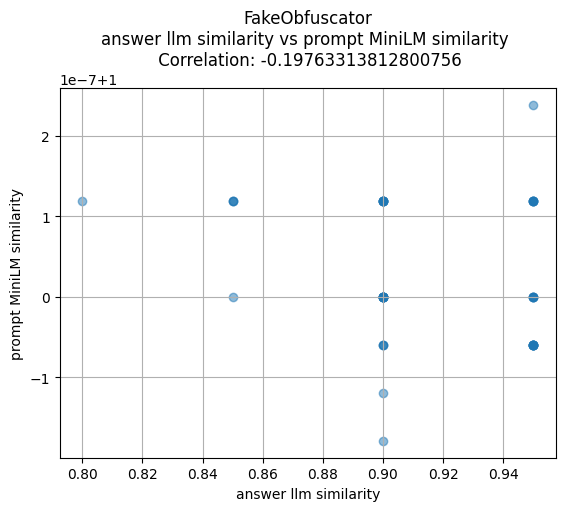

Correlation between answer llm similarity and prompt azure similarity: -0.1428571424519625


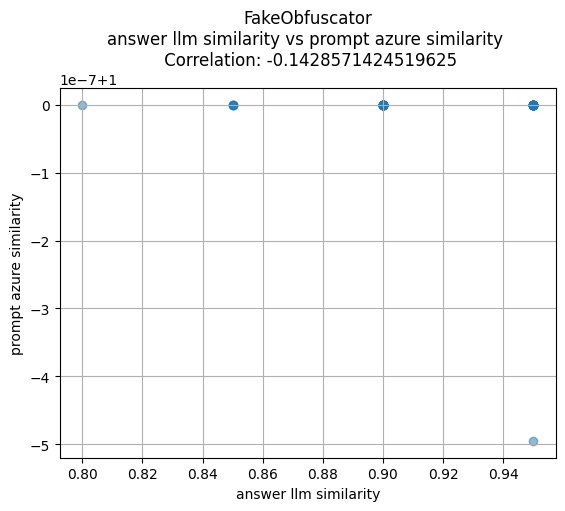

Correlation between prompt MiniLM similarity and prompt azure similarity: -0.15371466302680595


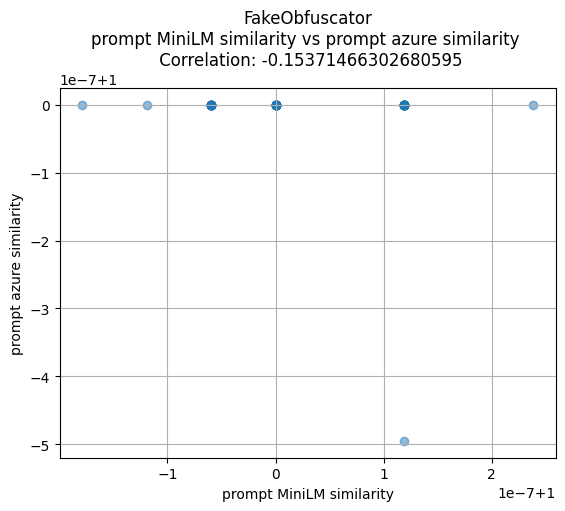

WrongObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.015745715737912263


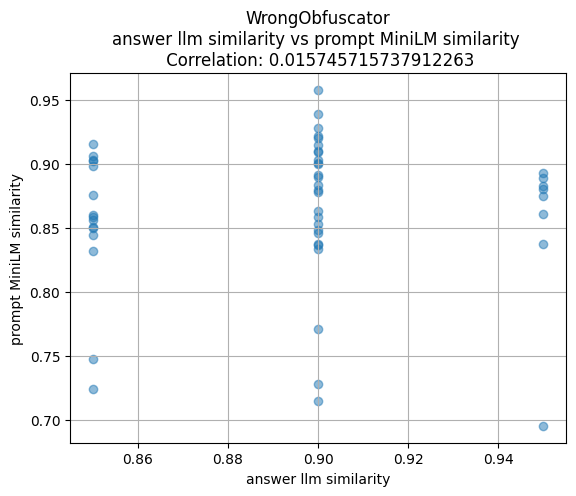

Correlation between answer llm similarity and prompt azure similarity: 0.17259543138489078


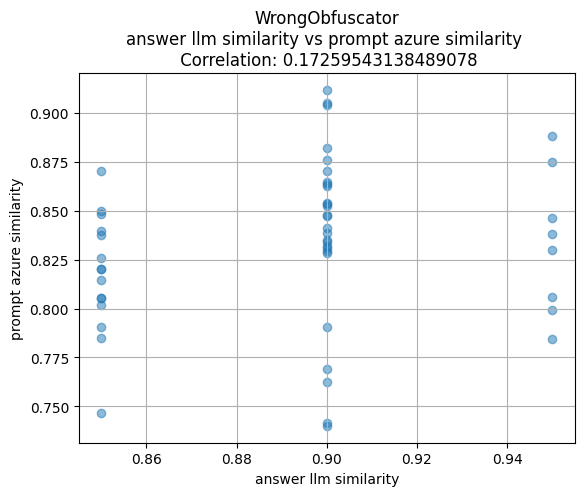

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.34367898429789895


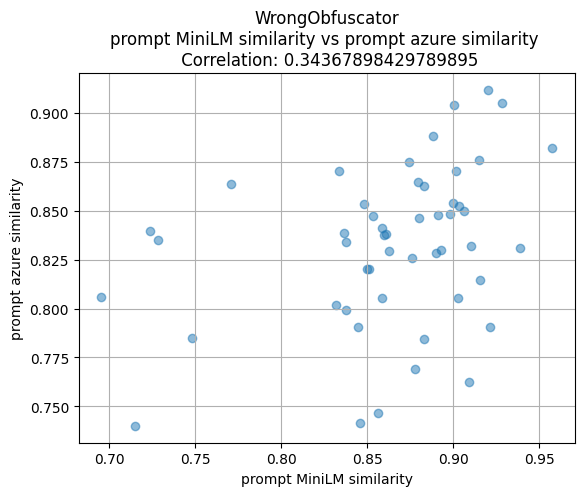

SmartRandom
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.46783019920568436


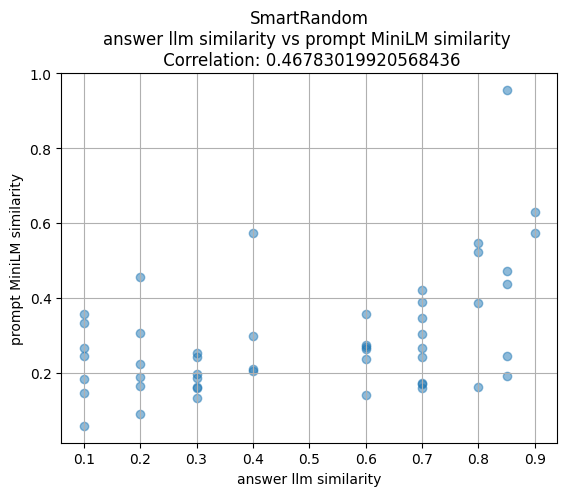

Correlation between answer llm similarity and prompt azure similarity: 0.374770460334614


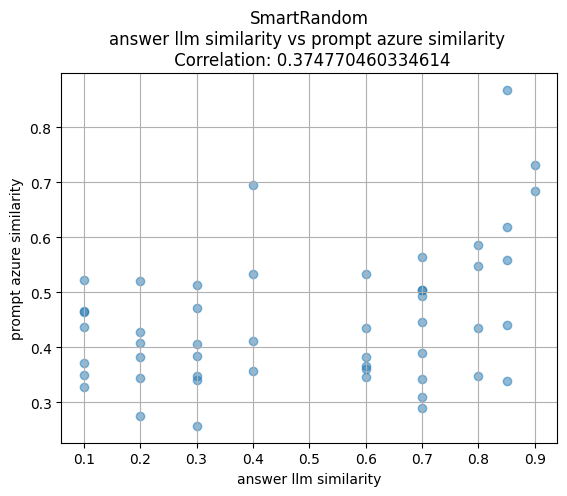

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.8785748353771877


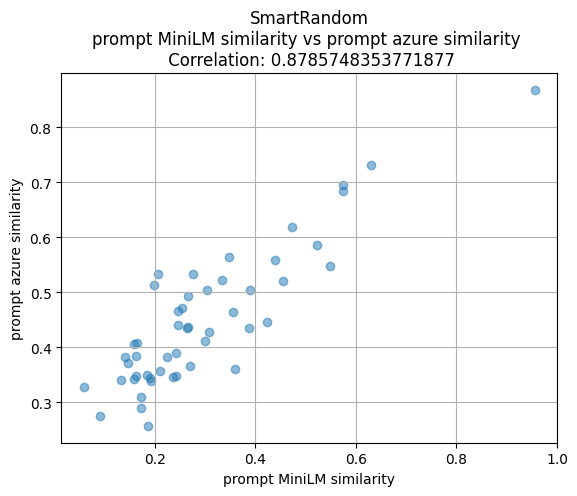

RandomText
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.11705539030675936


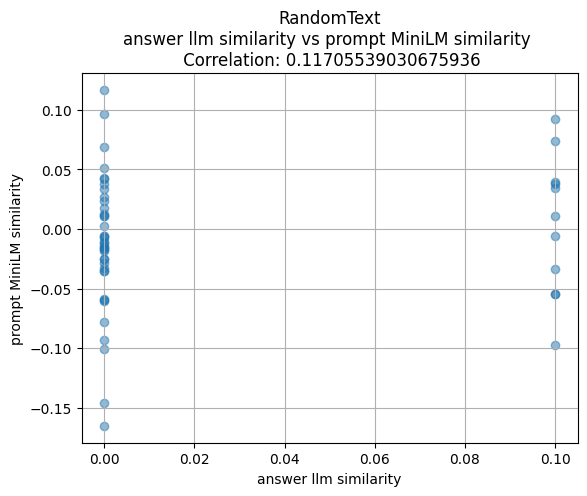

Correlation between answer llm similarity and prompt azure similarity: 0.18507029177877635


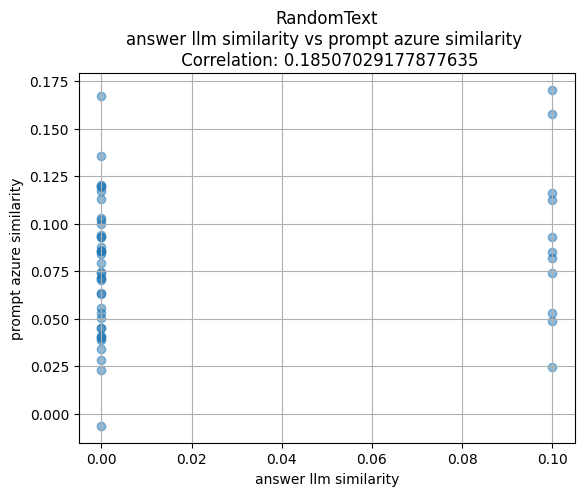

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.5326394907114755


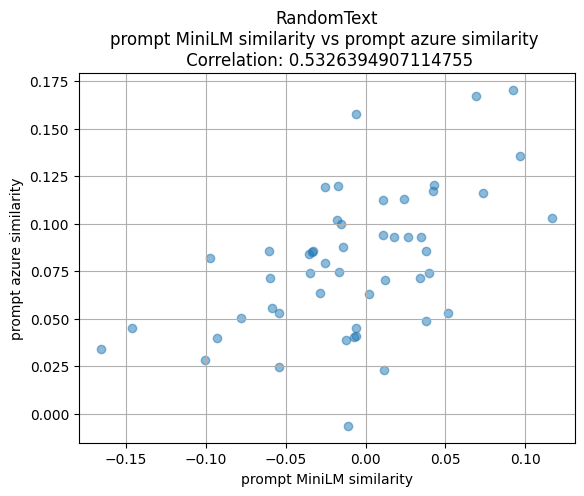

FewPromptsObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.29438796479380225


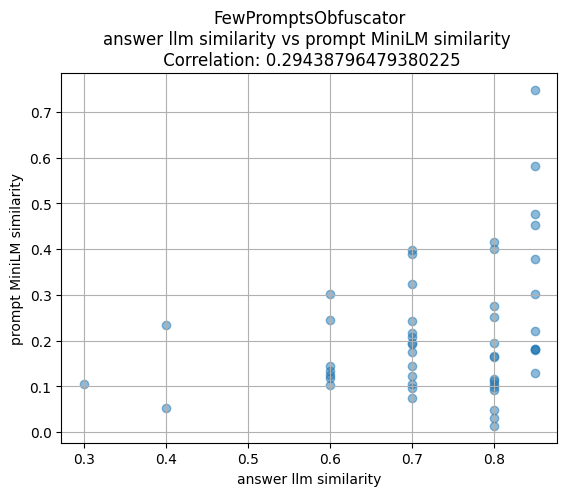

Correlation between answer llm similarity and prompt azure similarity: 0.3967941253639248


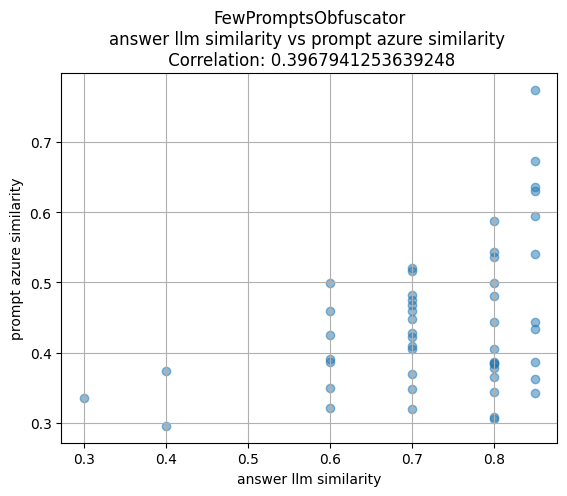

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.8370760376744494


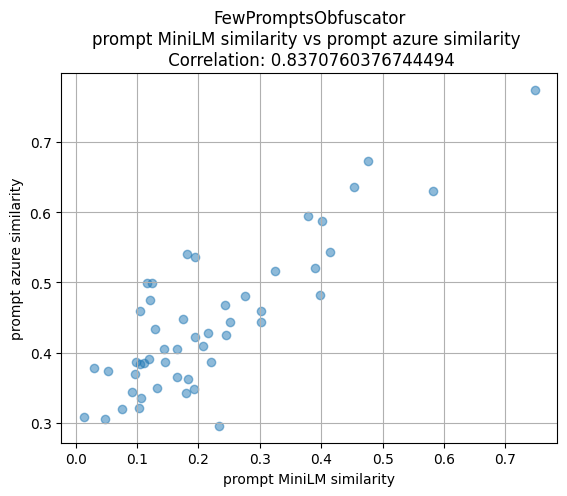

ThreePromptsObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.4794450989493465


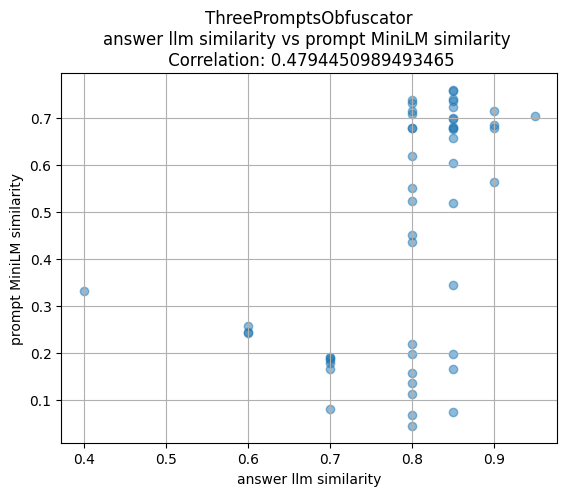

Correlation between answer llm similarity and prompt azure similarity: 0.5502180649704851


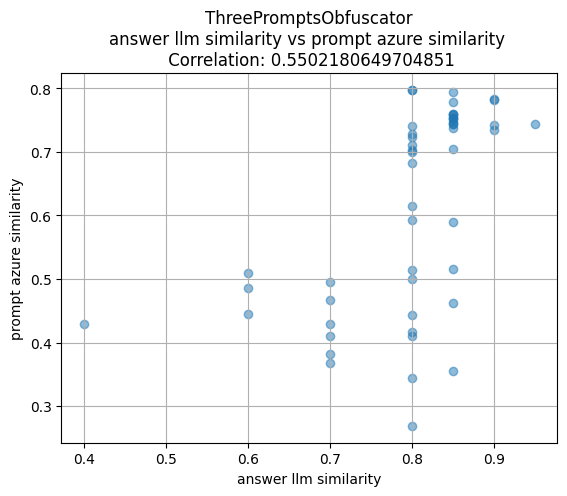

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.9440422107088311


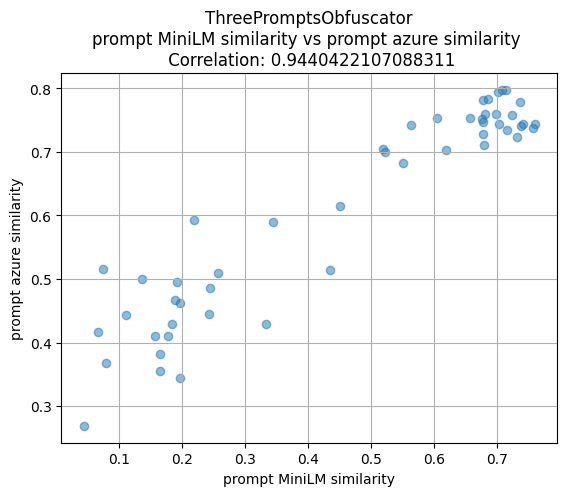

In [11]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the JSON file
data_to_use = "12_8_results_with_azure.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "12-8-2024", data_to_use)

# Load the JSON data
with open(inputfile_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract prompt_metric and answer_metric into a DataFrame
metrics = []

similarity_columns = ['answer llm similarity', 'prompt MiniLM similarity', 'prompt azure similarity']

for obfuscator in data:
    print (obfuscator[0])
    metrics = []
    for dict_index in obfuscator[1]:
        # if dict_index["answer_metric"]["llm similarity"] == 0.4 and obfuscator[0]=="FewPromptsObfuscator":
        #     print(dict_index)
        metrics.append({
            'answer llm similarity': dict_index['answer_metric']['llm similarity'],
            'prompt MiniLM similarity': dict_index['prompt_metric']['MiniLM similarity'],
            'prompt azure similarity': dict_index['prompt_metric']['azure similarity']
        })
     
    df = pd.DataFrame(metrics)
    print(len(df))
    for i in range(len(similarity_columns)):
        for j in range(i+1, len(similarity_columns)):
            correlation = df[similarity_columns[i]].corr(df[similarity_columns[j]])
            print(f"Correlation between {similarity_columns[i]} and {similarity_columns[j]}: {correlation}")

            plt.clf()   
            plt.scatter(df[similarity_columns[i]], df[similarity_columns[j]], alpha=0.5)
            plt.title(f'{obfuscator[0]}\n{similarity_columns[i]} vs {similarity_columns[j]} \n Correlation: {correlation}')
            plt.xlabel(similarity_columns[i])
            plt.ylabel(similarity_columns[j])
            plt.grid(True)

            name = f"scatter_plot_{obfuscator[0]}_{similarity_columns[i]}_{similarity_columns[j]}.png"
            output_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "13-8-2024", "prompt embedding to llm answer correlation",name)            
            plt.show()

In [207]:
for obfuscator in data:
    print (obfuscator[0])
    for case_dict in obfuscator[1]:
        if case_dict["answer_metric"]["llm_similarity"] <= 0.5 and case_dict["prompt_metric"]["ada_similarity"] >= 0.5 and obfuscator[0] == "ContextPromptObfuscator":
            for key,value in case_dict.items():
                print(key)
                print(value)
            print("__________________________________")


FakeObfuscator
RandomText
ContextPromptObfuscator
original_answer
Integrating diverse data streams into a unified analytics platform in the aviation industry, while ensuring compliance with aviation regulations and data privacy laws, is a complex task that requires meticulous planning and execution. Here are some best practices to achieve this:

### 1. **Data Governance and Compliance**
- **Establish a Data Governance Framework:** Create a robust data governance framework that outlines policies, procedures, and standards for data management. This should include data ownership, data quality, and data lifecycle management.
- **Regulatory Compliance:** Ensure that the integration process complies with aviation regulations such as EASA (European Union Aviation Safety Agency) and FAA (Federal Aviation Administration) guidelines. Also, adhere to data privacy laws like GDPR (General Data Protection Regulation) and CCPA (California Consumer Privacy Act).
- **Regular Audits and Monitoring:** Co

In [211]:

text ="""
Do not explain the emojis in your answer and do not add new emojis that were not in the original question.
Context: In 2019, the international airline ✈️🌍 initiated a project to improve its ⚙️📈 and 😊🛫 by leveraging 📊🧠 and 🤖🧠. The project, named "🛠️🧩," aimed to optimize ✈️🛠️, enhance 🔮🔧 of aircraft, and personalize 🛫👥. 🛠️🧩 involved collecting and analyzing vast amounts of data from various sources, including ✈️📡, ☁️📈, and 👥💻. One of the primary challenges was ensuring the seamless integration of these diverse 📊🌊 into a cohesive 📊🖥️, while also addressing stringent ✈️📜 and 🔒😟. The project required collaboration across multiple departments, including 💻🛠️, ⚙️📋, 😊📞, and 📜✅, under the leadership of ✈️🌍's 👨‍💼📊, 👩‍⚕️📊.
Question: What are the best practices for integrating diverse 📊🌊 into a unified 📊🖥️ in the aviation industry, while ensuring compliance with ✈️📜 and 🔒📜?
"""
client = AzureClient("azure_client",  "../", "gpt-4o-2024-05-13", 0.0)
print(client.send_query(text))
print(client.send_query("explain your answer"))

1. Establish clear data governance policies.
2. Implement robust data integration tools.
3. Ensure data quality and consistency.
4. Use standardized data formats and protocols.
5. Conduct regular audits and compliance checks.
6. Foster cross-departmental collaboration.
7. Invest in staff training and development.
8. Prioritize data security measures.
9. Leverage advanced analytics and AI.
10. Maintain transparent documentation and reporting.
Certainly! Here's a detailed explanation of the best practices for integrating diverse data streams into a unified system in the aviation industry, while ensuring compliance with aviation regulations and data security standards:

1. **Establish Clear Data Governance Policies**: Define roles, responsibilities, and processes for data management to ensure consistency and accountability across the organization.

2. **Implement Robust Data Integration Tools**: Use advanced software and platforms that can handle large volumes of data from various sources

In [3]:
from src.graph.plot_class import PlotClass
import os

file_name = "filltered_data_result.json"
    
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"),"data","15-08-2024", file_name)
metrics = ["prompt_metric","answer_metric"]
    
graph = PlotClass(inputfile_path, metrics)



In [4]:
df = graph.generate_individual_figure

In [14]:
metrics = ['answer_metric_llm_similarity', 'prompt_metric_llm_similarity', 'prompt_metric_ada_similarity']
# df.columns

trimped_df = df.loc[:,metrics]
for i in range(len(similarity_columns)):
        for j in range(i+1, len(similarity_columns)):
            correlation = df[similarity_columns[i]].corr(df[similarity_columns[j]])
            print(f"Correlation between {similarity_columns[i]} and {similarity_columns[j]}: {correlation}")

            plt.clf()   
            plt.scatter(df[similarity_columns[i]], df[similarity_columns[j]], alpha=0.5)
            plt.title(f'{obfuscator[0]}\n{similarity_columns[i]} vs {similarity_columns[j]} \n Correlation: {correlation}')
            plt.xlabel(similarity_columns[i])
            plt.ylabel(similarity_columns[j])
            plt.grid(True)

            name = f"scatter_plot_{obfuscator[0]}_{similarity_columns[i]}_{similarity_columns[j]}.png"
            output_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "13-8-2024", "prompt embedding to llm answer correlation",name)            
            plt.show()




     answer_metric_llm_similarity  prompt_metric_llm_similarity  \
0                            0.90                           0.0   
1                            0.85                           0.0   
2                            0.90                           0.0   
3                            0.85                           0.0   
4                            0.85                           0.0   
..                            ...                           ...   
119                          0.70                           1.0   
120                          0.85                           0.9   
121                          0.80                           0.9   
122                          0.85                           0.9   
123                          0.85                           0.9   

     prompt_metric_ada_similarity  
0                        1.000000  
1                        1.000000  
2                        1.000000  
3                        1.000000  
4              

FakeObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.11073249672463814


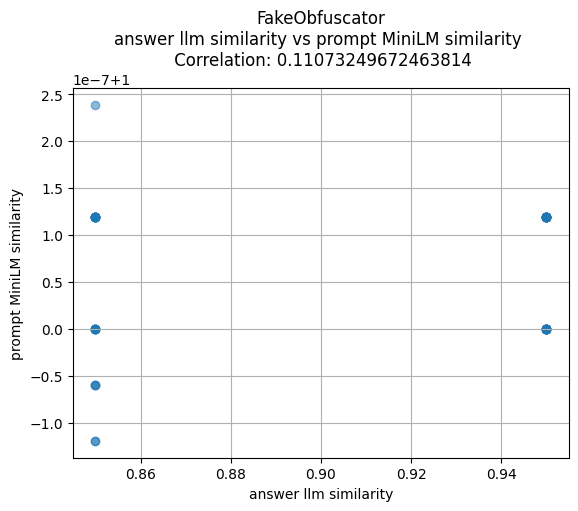

Correlation between answer llm similarity and prompt azure similarity: -0.10344793622502609


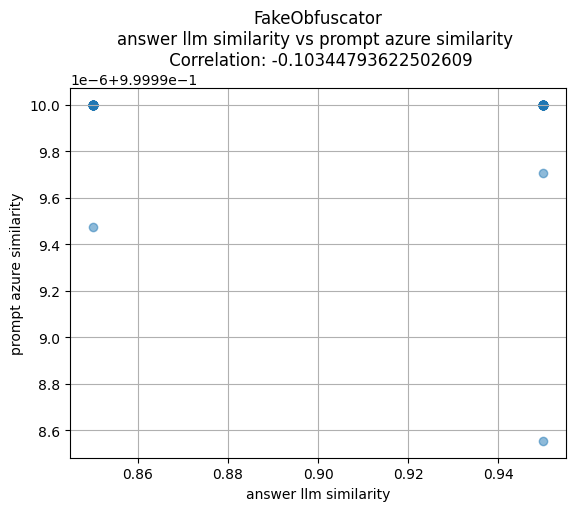

Correlation between prompt MiniLM similarity and prompt azure similarity: -0.09654574048413674


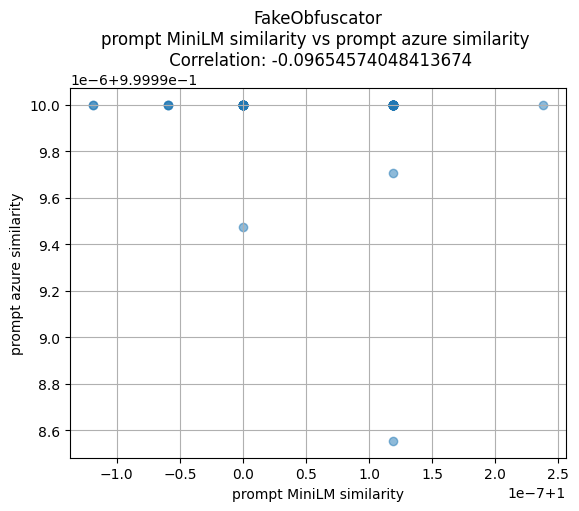

RandomText
50
Correlation between answer llm similarity and prompt MiniLM similarity: nan


c:\Users\orendi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\orendi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


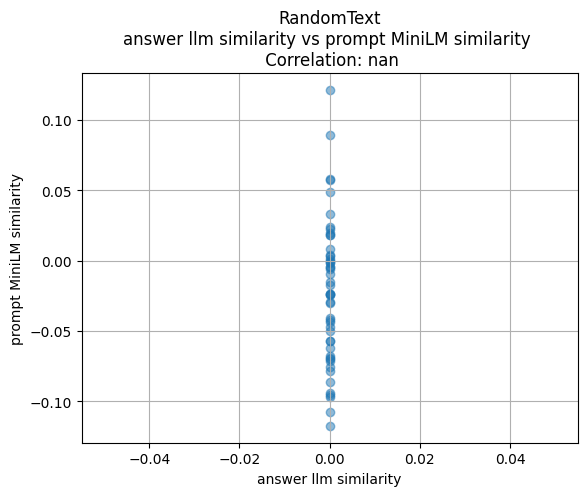

Correlation between answer llm similarity and prompt azure similarity: nan


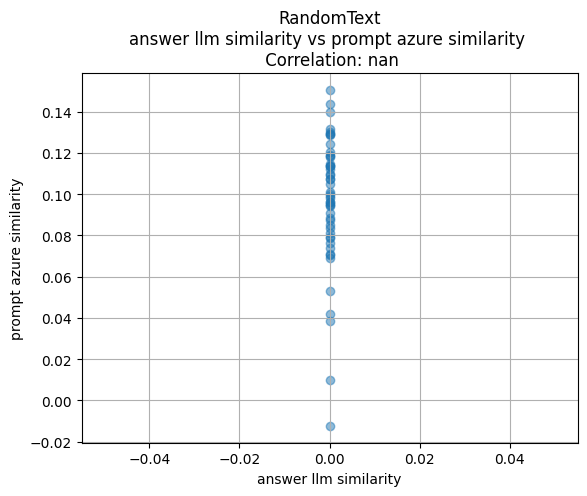

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.3799200502658565


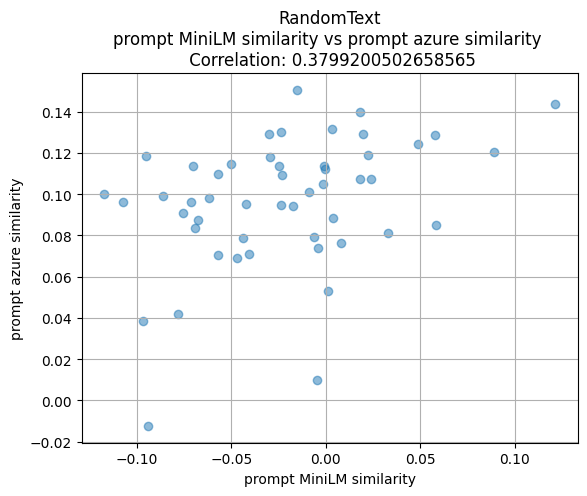

ContextReletiveObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.16427965267826933


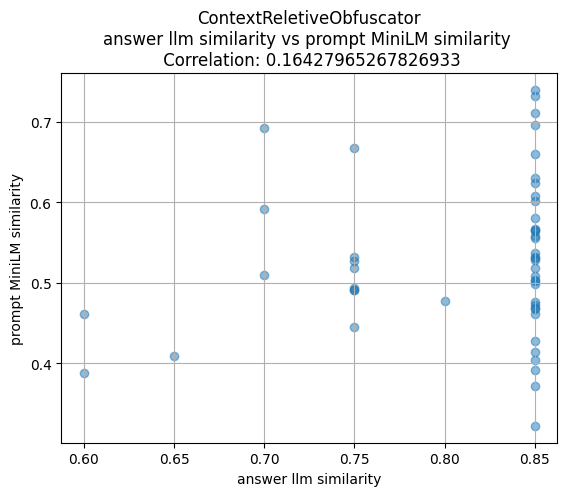

Correlation between answer llm similarity and prompt azure similarity: 0.1472710965786078


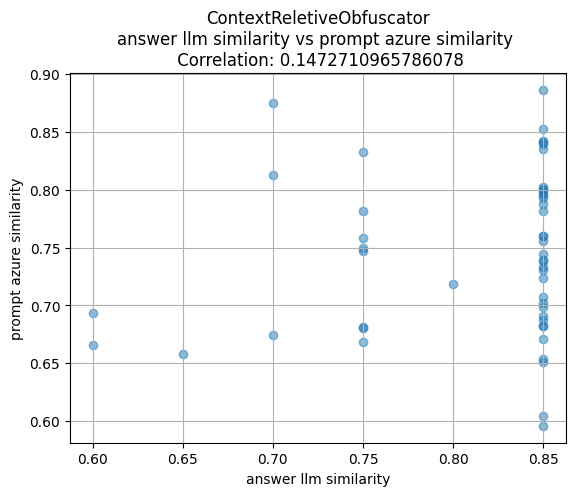

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.6603110226421017


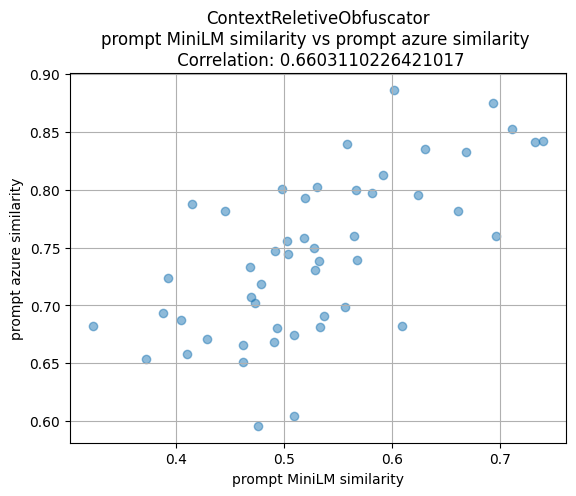

ContextOnlyObfuscator
50
Correlation between answer llm similarity and prompt MiniLM similarity: 0.2403041759863354


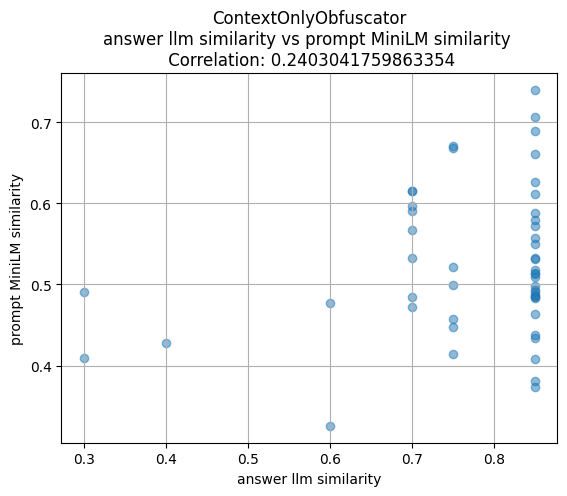

Correlation between answer llm similarity and prompt azure similarity: 0.19875625731135005


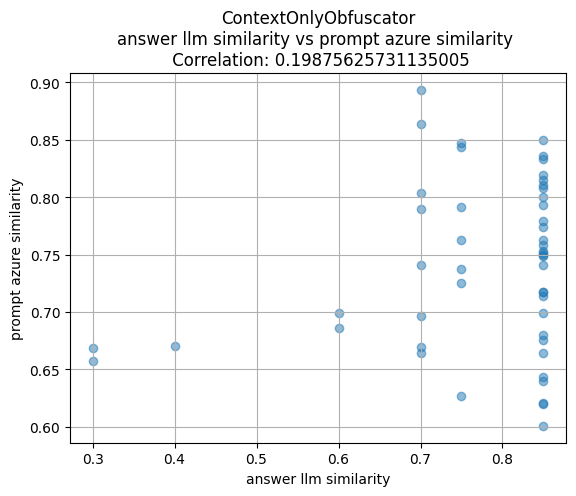

Correlation between prompt MiniLM similarity and prompt azure similarity: 0.6668296578143482


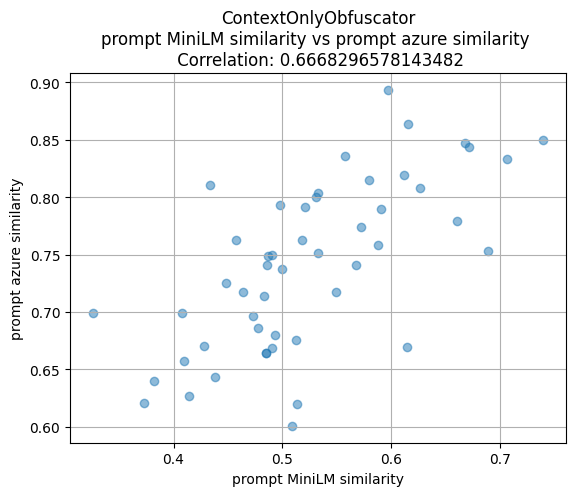

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the JSON file
data_to_use = "RESULTS_context_test_2024-08-19_00_40_56.378972.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "18-08-2024", data_to_use)

# Load the JSON data
with open(inputfile_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract prompt_metric and answer_metric into a DataFrame
metrics = []

similarity_columns = ['answer llm similarity', 'prompt MiniLM similarity', 'prompt azure similarity']

for obfuscator in data:
    print (obfuscator[0])
    metrics = []
    for dict_index in obfuscator[1]:
        # if dict_index["answer_metric"]["llm similarity"] == 0.4 and obfuscator[0]=="FewPromptsObfuscator":
        #     print(dict_index)
        metrics.append({
            'answer llm similarity': dict_index['answer_metric']['llm_similarity'],
            'prompt MiniLM similarity': dict_index['prompt_metric']['MiniLM'],
            'prompt azure similarity': dict_index['prompt_metric']['ada_similarity']
        })
     
    df = pd.DataFrame(metrics)
    print(len(df))
    for i in range(len(similarity_columns)):
        for j in range(i+1, len(similarity_columns)):
            correlation = df[similarity_columns[i]].corr(df[similarity_columns[j]])
            print(f"Correlation between {similarity_columns[i]} and {similarity_columns[j]}: {correlation}")

            plt.clf()   
            plt.scatter(df[similarity_columns[i]], df[similarity_columns[j]], alpha=0.5)
            plt.title(f'{obfuscator[0]}\n{similarity_columns[i]} vs {similarity_columns[j]} \n Correlation: {correlation}')
            plt.xlabel(similarity_columns[i])
            plt.ylabel(similarity_columns[j])
            plt.grid(True)

            name = f"scatter_plot_{obfuscator[0]}_{similarity_columns[i]}_{similarity_columns[j]}.png"
            output_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "13-8-2024", "prompt embedding to llm answer correlation",name)            
            plt.show()

ContextReletiveObfuscator
50
Correlation between answer llm similarity and prompt azure similarity: 0.3742715141509268


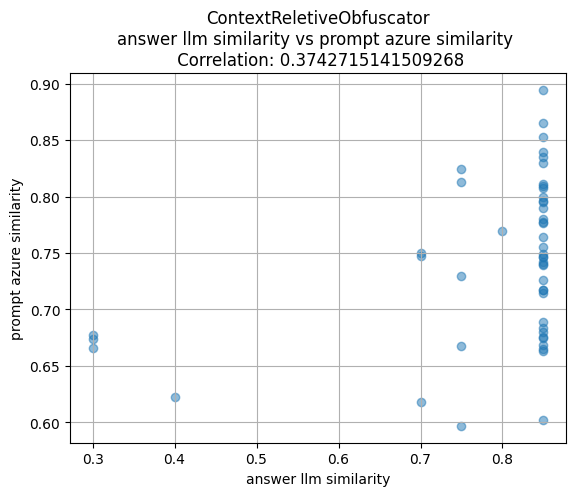

ContextOnlyObfuscator
50
Correlation between answer llm similarity and prompt azure similarity: 0.27948831592706347


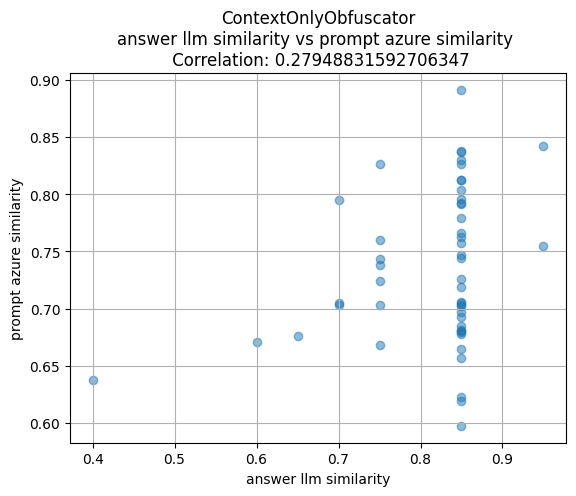

In [12]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the JSON file
data_to_use = "RESULTS_smart_random_test_2024-08-19_13_26_46.259087.json"
inputfile_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "19-08-2024", data_to_use)

# Load the JSON data
with open(inputfile_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract prompt_metric and answer_metric into a DataFrame
metrics = []

similarity_columns = ['answer llm similarity', 'prompt azure similarity']

for obfuscator in data:
    print (obfuscator[0])
    metrics = []
    for dict_index in obfuscator[1]:
        # if dict_index["answer_metric"]["llm similarity"] == 0.4 and obfuscator[0]=="FewPromptsObfuscator":
        #     print(dict_index)
        metrics.append({
            'answer llm similarity': dict_index['answer_metric']['llm_similarity'],
            'prompt azure similarity': dict_index['prompt_metric']['ada_similarity']
        })
     
    df = pd.DataFrame(metrics)
    print(len(df))
    for i in range(len(similarity_columns)):
        for j in range(i+1, len(similarity_columns)):
            correlation = df[similarity_columns[i]].corr(df[similarity_columns[j]])
            print(f"Correlation between {similarity_columns[i]} and {similarity_columns[j]}: {correlation}")

            plt.clf()   
            plt.scatter(df[similarity_columns[i]], df[similarity_columns[j]], alpha=0.5)
            plt.title(f'{obfuscator[0]}\n{similarity_columns[i]} vs {similarity_columns[j]} \n Correlation: {correlation}')
            plt.xlabel(similarity_columns[i])
            plt.ylabel(similarity_columns[j])
            plt.grid(True)

            name = f"scatter_plot_{obfuscator[0]}_{similarity_columns[i]}_{similarity_columns[j]}.png"
            output_path = os.path.join(os.getenv("PROJECT_PATH"), "data", "13-8-2024", "prompt embedding to llm answer correlation",name)            
            plt.show()